In [ ]:
#Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import the dataset

df = pd.read_csv("/content/EPL_20_21.csv")
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
df.isna().sum()

In [ ]:
#add 2 new columns

df['MinsPerMatch'] = (df['Mins'] / df['Matches']).astype(int)
df['GoalsPerMatch'] = (df['Goals'] / df['Matches']).astype(float)


In [ ]:
#Total goals
Total_Goals = df['Goals'].sum()

In [ ]:
#Penalty goals
Total_PenaltyGoals = df['Penalty_Goals'].sum()

In [ ]:
#Penalty goal attempts
Total_PenaltyGoalAttempts = df['Penalty_Attempted'].sum()

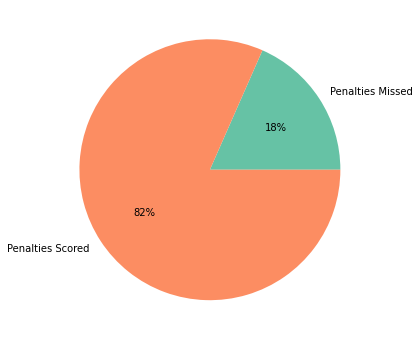

In [ ]:
#Pie chart for penalties missed vs scored
plt.figure(figsize=(13,6))
penalty_not_scored = Total_PenaltyGoalAttempts - Total_PenaltyGoals
data = [penalty_not_scored , Total_PenaltyGoals]
labels = ['Penalties Missed' , 'Penalties Scored']
color = sns.color_palette('Set2')
plt.pie(data , labels=labels , colors=color , autopct = "%.0f%%")
plt.show()

In [ ]:
#unique positions
df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [ ]:
#total fw players
df[df['Position'] == 'FW']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0,47,0.272727
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0,44,0.235294
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0,60,0.000000
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0,81,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,262,70.6,0,0,0.17,0.13,2,0,50,0.040000
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,426,62.9,0,0,0.21,0.07,2,0,57,0.043478
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0,41,0.000000
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0,45,0.187500


In [ ]:
#players from different nations
np.size(df['Nationality'].unique())

59

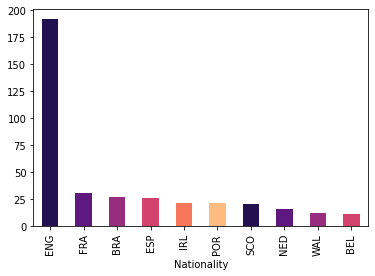

In [ ]:
#most players from which countries
nationality = df.groupby('Nationality').size().sort_values(ascending = False)
nationality.head(10).plot(kind = 'bar' , color = sns.color_palette("magma"))

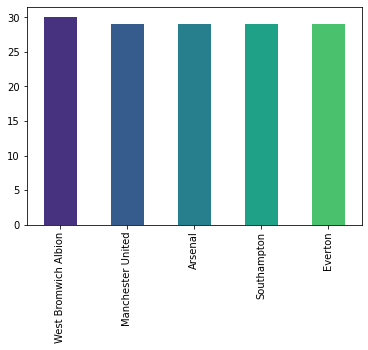

In [ ]:
#club with maximum players in their squad
df['Club'].value_counts().head(5).plot(kind = 'bar' , color = sns.color_palette('viridis'))

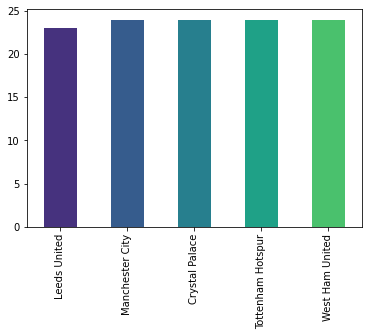

In [ ]:
#club with least players in their squad
df['Club'].value_counts().nsmallest(5).plot(kind = 'bar' , color = sns.color_palette('viridis'))

In [ ]:
#players based on age group
under20 = df[df['Age'] <=20 ]
age20_25 = df[(df['Age'] > 20) & (df['Age'] <= 25)]
age25_30 = df[(df['Age'] > 25) & (df['Age'] <= 30)]
above30 = df[df['Age'] >30 ]

([<matplotlib.patches.Wedge at 0x7fdd4ee82d90>,
 [Text(0.9853599333701518, 0.4889435567719143, '<=20'),
  Text(-0.4772721793080792, 0.9910657227744873, '>20 & <=25'),
  Text(-0.45964061401351897, -0.9993650513947722, '>25 & <=30'),
  Text(1.0047237910442863, -0.44780587726111565, '>30')],
 [Text(0.5374690545655373, 0.26669648551195324, '15%'),
  Text(-0.2603302796225886, 0.5405813033315385, '35%'),
  Text(-0.25071306218919215, -0.5451082098516938, '37%'),
  Text(0.5480311587514288, -0.2442577512333358, '13%')])

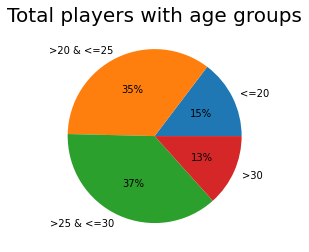

In [ ]:
x = np.array([under20['Name'].count(),age20_25['Name'].count(),age25_30['Name'].count(),above30['Name'].count()])
labels = ["<=20",">20 & <=25",">25 & <=30",">30"]
plt.title("Total players with age groups", fontsize = 20)
plt.pie(x, labels = labels, autopct = "%.0f%%")

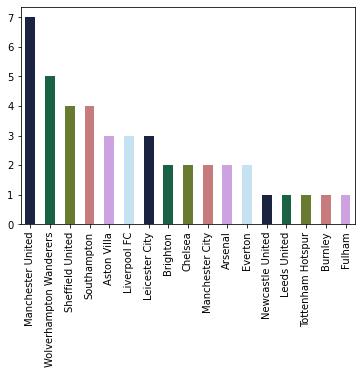

In [ ]:
#total under 20 players in each club
players_under_20 = df[df['Age'] <20 ]
players_under_20['Club'].value_counts().plot(kind = 'bar',color = sns.color_palette("cubehelix"))


In [ ]:
#under 20 players in Man U
players_under_20[players_under_20['Club']=='Manchester United']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
61,Mason Greenwood,Manchester United,ENG,FW,18,31,21,1822,7,2,732,83.1,0,0,0.37,0.09,2,0,58,0.225806
72,Brandon Williams,Manchester United,ENG,DF,19,4,2,188,0,0,140,85.7,0,0,0.05,0.01,0,0,47,0.000000
73,Amad Diallo,Manchester United,CIV,FW,18,3,2,166,0,1,64,84.4,0,0,0.02,0.26,0,0,55,0.000000
74,Anthony Elanga,Manchester United,SWE,FW,18,2,2,155,1,0,53,81.1,0,0,0.16,0.02,0,0,77,0.500000
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,8,75.0,0,0,0.00,0.00,0,0,5,0.000000
78,Hannibal Mejbri,Manchester United,FRA,MF,17,1,0,9,0,0,3,100.0,0,0,0.00,0.00,0,0,9,0.000000
79,William Thomas Fish,Manchester United,ENG,DF,17,1,0,1,0,0,1,0.0,0,0,0.00,0.00,0,0,1,0.000000


In [ ]:
#under 20 players in Chelsea
players_under_20[players_under_20['Club']=='Chelsea']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
18,Callum Hudson-Odoi,Chelsea,ENG,"FW,DF",19,23,10,1059,2,3,659,82.2,0,0,0.12,0.26,0,0,46,0.086957
21,Billy Gilmour,Chelsea,SCO,MF,19,5,3,261,0,0,215,89.3,0,0,0.01,0.04,0,0,52,0.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

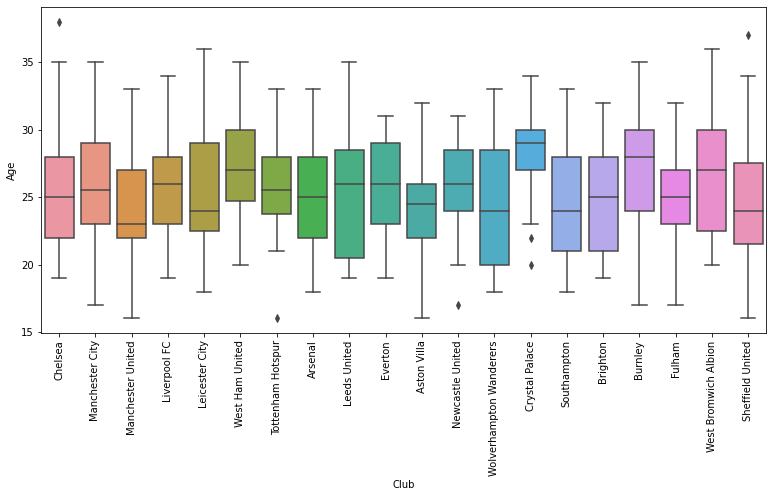

In [ ]:
#average age of players in each club
plt.figure(figsize=(13,6))
sns.boxplot(x = 'Club', y = 'Age', data =df)
plt.xticks(rotation = 90)

In [ ]:
num_players = df.groupby('Club').size()
data = (df.groupby('Club')['Age'].sum()) / num_players
data.sort_values(ascending = False)

Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Chelsea                    25.592593
Leicester City             25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
dtype: float64

Text(0.5, 1.0, 'Plot of clubs vs total assists')

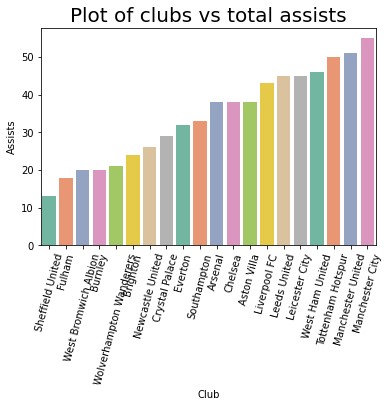

In [ ]:
# Total assists from each club

assists_by_clubs = pd.DataFrame(df.groupby('Club', as_index=False)['Assists'].sum())
ax = sns.barplot(x = 'Club' , y = 'Assists' , data = assists_by_clubs.sort_values(by='Assists'),palette='Set2')
ax.set_xlabel('Club')
ax.set_ylabel('Assists')
plt.xticks(rotation=75)
plt.rcParams['figure.figsize'] = (20,8)
plt.title('Plot of clubs vs total assists', fontsize = 20)

In [ ]:
#Top 10 Assists
top_10_assists = df[['Name','Club','Assists','Matches']].nlargest(n=10,columns='Assists')
top_10_assists

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


Text(0.5, 1.0, 'Plot of clubs vs total goals')

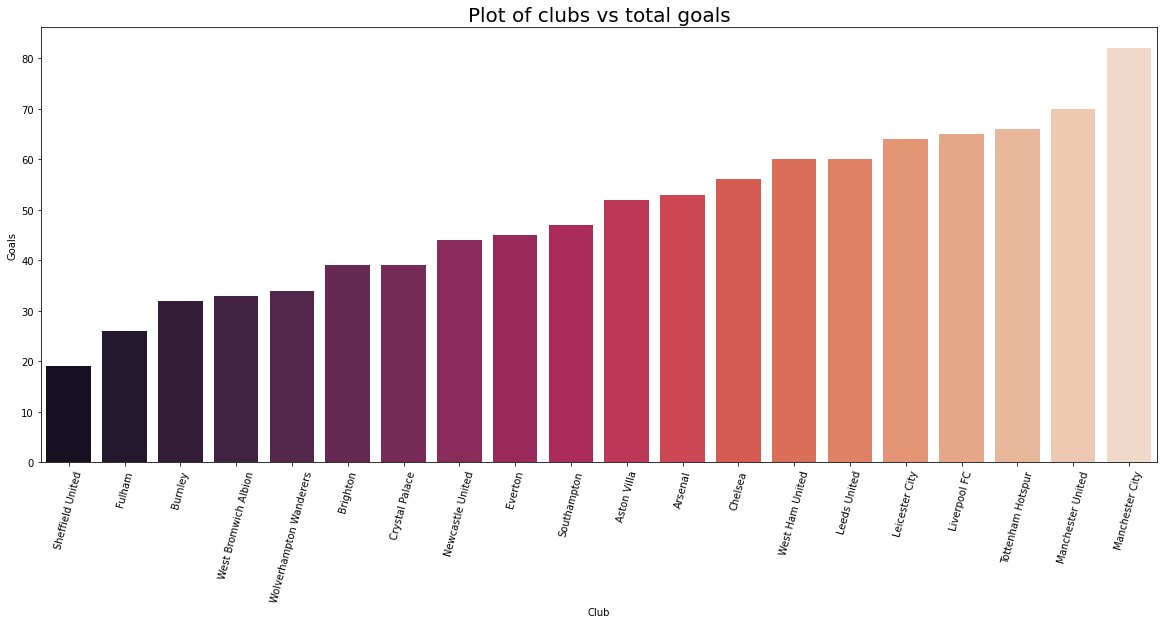

In [ ]:
# Total Goals from each club

goals_by_clubs = pd.DataFrame(df.groupby('Club', as_index=False)['Goals'].sum())
ax = sns.barplot(x = 'Club' , y = 'Goals' , data = goals_by_clubs.sort_values(by='Goals'),palette='rocket')
ax.set_xlabel('Club')
ax.set_ylabel('Goals')
plt.xticks(rotation=75)
plt.rcParams['figure.figsize'] = (20,8)
plt.title('Plot of clubs vs total goals', fontsize = 20)

In [ ]:
#Most goals by players

top_10_goals = df[['Name','Club','Goals','Matches']].nlargest(n=10,columns='Goals')
top_10_goals

,Name,Club,Goals,Matches
162,Harry Kane,Tottenham Hotspur,23,35
81,Mohamed Salah,Liverpool FC,22,37
51,Bruno Fernandes,Manchester United,18,37
161,Son Heung-min,Tottenham Hotspur,17,37
214,Patrick Bamford,Leeds United,17,38
237,Dominic Calvert-Lewin,Everton,16,33
110,Jamie Vardy,Leicester City,15,34
267,Ollie Watkins,Aston Villa,14,37
33,İlkay Gündoğan,Manchester City,13,28
191,Alexandre Lacazette,Arsenal,13,31


In [ ]:
#Goals per match

top_10_goals_per_match = df[['Name','GoalsPerMatch','Matches','Goals']].nlargest(n=10,columns='GoalsPerMatch')
top_10_goals_per_match

,Name,GoalsPerMatch,Matches,Goals
162,Harry Kane,0.657143,35,23
81,Mohamed Salah,0.594595,37,22
307,Joe Willock,0.571429,14,8
145,Jesse Lingard,0.562500,16,9
175,Gareth Bale,0.550000,20,11
74,Anthony Elanga,0.500000,2,1
51,Bruno Fernandes,0.486486,37,18
237,Dominic Calvert-Lewin,0.484848,33,16
120,Kelechi Iheanacho,0.480000,25,12
92,Diogo Jota,0.473684,19,9


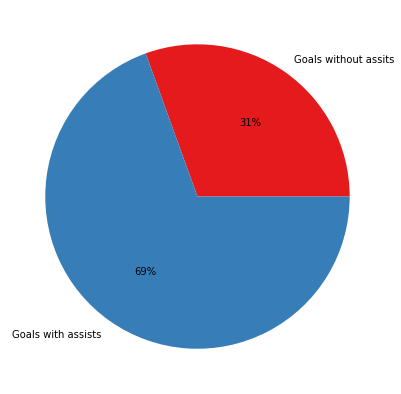

In [ ]:
#Pie chart - Goals with and without Assists

plt.figure(figsize=(14,7))
assists = df['Assists'].sum()
data = [Total_Goals - assists, assists]
labels = ['Goals without assits','Goals with assists']
color = sns.color_palette('Set1')
plt.pie(data, labels = labels, colors = color , autopct = '%.0f%%')
plt.show()

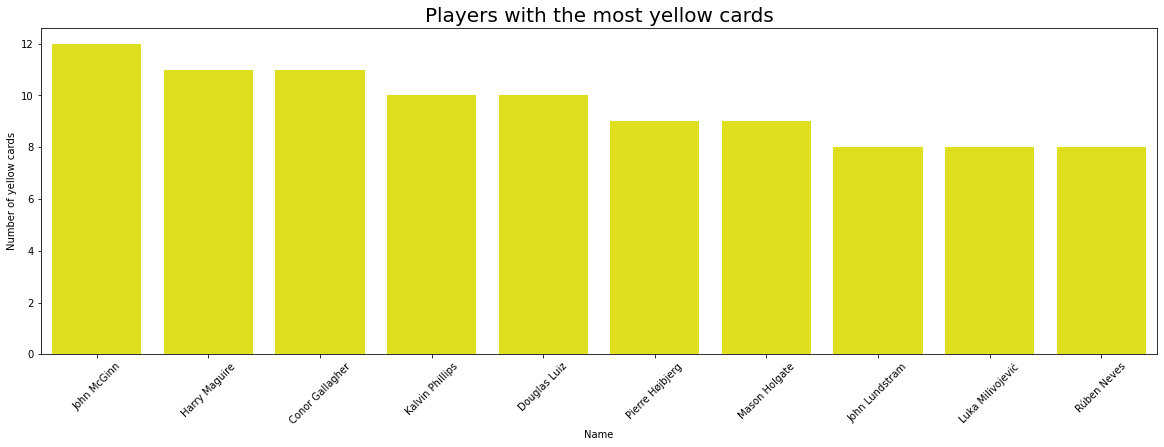

In [ ]:
# Top 10 players with most yellow cards

yellow = df.sort_values(by='Yellow_Cards', ascending=False)[:10]
plt.figure(figsize=(20,6))
plt.title('Players with the most yellow cards',fontsize=20)
c = sns.barplot(x=yellow['Name'], y=yellow['Yellow_Cards'], label='Players',color='yellow')
plt.ylabel('Number of yellow cards')
c.set_xticklabels(c.get_xticklabels(),rotation=45)
c